Basado en:
Data for Chains of Options
Dr. Yves J. Hilpisch | The Python Quants GmbH

In [230]:
import eikon as ek  # the Eikon Python wrapper package
import numpy as np  # NumPy
import pandas as pd  # pandas
import cufflinks as cf  # Cufflinks
import configparser as cp
cf.set_config_file(offline=True)  # set the plotting mode to offline

In [231]:
cfg = cp.ConfigParser()
cfg.read('../refinitiv.cfg')


['../refinitiv.cfg']

In [233]:
ek.set_app_key(cfg['eikon']['app_id']) #set_app_id function being deprecated

In [234]:
fields = ['PUTCALLIND', 'STRIKE_PRC', 'EXPIR_DATE', 'CF_CLOSE', 'IMP_VOLT']

In [163]:
'0#SPX*.U'
'0#SPXW*.U'
'0#GDAX*.EX'
'0#AAPL*.EX'

'0#AAPL*.EX'

In [260]:
SPX = ek.get_data('0#AAPL*.EX', fields=fields)[0]

In [261]:
SPX

Instrument PUTCALLIND  STRIKE_PRC  EXPIR_DATE  CF_CLOSE  IMP_VOLT
0          /AAPL.DE       <NA>        <NA>        <NA>    172.56      <NA>
1    /AAPL0001E4.EX       CALL        0.01  2024-05-17    172.67      <NA>
2    /AAPL0001Q4.EX       PUT         0.01  2024-05-17      <NA>      <NA>
3    /AAPL1280E4.EX       CALL       128.0  2024-05-17     44.72   26.2231
4    /AAPL1280Q4.EX       PUT        128.0  2024-05-17      0.01  107.1151
..              ...        ...         ...         ...       ...       ...
472  /AAPL3200X5.EX       PUT        320.0  2025-12-19    147.32   37.0273
473  /AAPL3600L5.EX       CALL       360.0  2025-12-19      0.16   22.5812
474  /AAPL3600X5.EX       PUT        360.0  2025-12-19    187.32   42.7313
475  /AAPL4000L5.EX       CALL       400.0  2025-12-19      0.08   23.7763
476  /AAPL4000X5.EX       PUT        400.0  2025-12-19    227.32    47.625

[477 rows x 6 columns]

In [262]:
SPX["EXPIR_DATE"].drop_duplicates()

0            <NA>
1      2024-05-17
69     2024-06-21
151    2024-07-19
223    2024-09-20
281    2024-12-20
339    2025-03-21
397    2025-06-20
437    2025-12-19
Name: EXPIR_DATE, dtype: string

In [263]:
SPXI = SPX.iloc[0]['CF_CLOSE']

In [264]:
SPXI

172.56

In [265]:
puts = SPX[SPX['PUTCALLIND'] == 'PUT '].where(SPX["EXPIR_DATE"]=="2024-07-19")
calls = SPX[SPX['PUTCALLIND'] == 'CALL'].where(SPX["EXPIR_DATE"]=="2024-07-19")

In [266]:
limit = 30

In [267]:
puts = puts[abs(puts['STRIKE_PRC'] - SPXI) < limit].dropna()
calls = calls[abs(calls['STRIKE_PRC'] - SPXI) < limit].dropna()

In [268]:
puts

Instrument PUTCALLIND  STRIKE_PRC  EXPIR_DATE  CF_CLOSE  IMP_VOLT
174  /AAPL1440S4.EX       PUT        144.0  2024-07-19      0.37   26.7009
176  /AAPL1460S4.EX       PUT        146.0  2024-07-19      0.44   26.0515
178  /AAPL1480S4.EX       PUT        148.0  2024-07-19      0.52   25.5239
180  /AAPL1500S4.EX       PUT        150.0  2024-07-19      0.61   24.5542
182  /AAPL1520S4.EX       PUT        152.0  2024-07-19      0.73   23.8721
184  /AAPL1540S4.EX       PUT        154.0  2024-07-19      0.87     23.37
186  /AAPL1560S4.EX       PUT        156.0  2024-07-19      1.04   22.5535
188  /AAPL1580S4.EX       PUT        158.0  2024-07-19      1.24   21.8713
190  /AAPL1600S4.EX       PUT        160.0  2024-07-19       1.5   21.4316
192  /AAPL1620S4.EX       PUT        162.0  2024-07-19       1.8   20.6699
194  /AAPL1640S4.EX       PUT        164.0  2024-07-19      2.17   20.2406
196  /AAPL1660S4.EX       PUT        166.0  2024-07-19      2.61   19.5713
198  /AAPL1680S4.EX       PUT        168.0  2024-07-19      3.15   19.1578
200  /AAPL1700S4.EX       PUT        170.0  2024-07-19      3.78   18.6005
202  /AAPL1720S4.EX       PUT        172.0  2024-07-19      4.53   18.2147
204  /AAPL1740S4.EX       PUT        174.0  2024-07-19       5.4    17.712
206  /AAPL1760S4.EX       PUT        176.0  2024-07-19      6.41   17.4219
208  /AAPL1780S4.EX       PUT        178.0  2024-07-19      7.58   17.0283
210  /AAPL1800S4.EX       PUT        180.0  2024-07-19       8.9    16.914
212  /AAPL1820S4.EX       PUT        182.0  2024-07-19     10.36   16.6415
214  /AAPL1840S4.EX       PUT        184.0  2024-07-19     11.95   16.5511
216  /AAPL1860S4.EX       PUT        186.0  2024-07-19     13.66   16.4798
218  /AAPL1880S4.EX       PUT        188.0  2024-07-19     15.47   16.4654
220  /AAPL1900S4.EX       PUT        190.0  2024-07-19     17.36   16.4878
222  /AAPL1920S4.EX       PUT        192.0  2024-07-19     19.32   17.1987

In [269]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 173 to 221
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Instrument  25 non-null     string 
 1   PUTCALLIND  25 non-null     string 
 2   STRIKE_PRC  25 non-null     Float64
 3   EXPIR_DATE  25 non-null     string 
 4   CF_CLOSE    25 non-null     Float64
 5   IMP_VOLT    25 non-null     Float64
dtypes: Float64(3), string(3)
memory usage: 1.4 KB


In [270]:
calls

Instrument PUTCALLIND  STRIKE_PRC  EXPIR_DATE  CF_CLOSE  IMP_VOLT
173  /AAPL1440G4.EX       CALL       144.0  2024-07-19     30.06   26.6676
175  /AAPL1460G4.EX       CALL       146.0  2024-07-19     28.14   25.9654
177  /AAPL1480G4.EX       CALL       148.0  2024-07-19     26.23   25.4167
179  /AAPL1500G4.EX       CALL       150.0  2024-07-19     24.34   24.5388
181  /AAPL1520G4.EX       CALL       152.0  2024-07-19     22.46   23.7356
183  /AAPL1540G4.EX       CALL       154.0  2024-07-19     20.62   23.3063
185  /AAPL1560G4.EX       CALL       156.0  2024-07-19      18.8   22.5016
187  /AAPL1580G4.EX       CALL       158.0  2024-07-19     17.02   21.8661
189  /AAPL1600G4.EX       CALL       160.0  2024-07-19     15.28   21.3976
191  /AAPL1620G4.EX       CALL       162.0  2024-07-19     13.59   20.6274
193  /AAPL1640G4.EX       CALL       164.0  2024-07-19     11.97   20.2107
195  /AAPL1660G4.EX       CALL       166.0  2024-07-19     10.42   19.5725
197  /AAPL1680G4.EX       CALL       168.0  2024-07-19      8.95   19.1045
199  /AAPL1700G4.EX       CALL       170.0  2024-07-19      7.58   18.5701
201  /AAPL1720G4.EX       CALL       172.0  2024-07-19      6.32   18.1657
203  /AAPL1740G4.EX       CALL       174.0  2024-07-19      5.18    17.685
205  /AAPL1760G4.EX       CALL       176.0  2024-07-19      4.17    17.404
207  /AAPL1780G4.EX       CALL       178.0  2024-07-19      3.31   17.0079
209  /AAPL1800G4.EX       CALL       180.0  2024-07-19      2.59    16.946
211  /AAPL1820G4.EX       CALL       182.0  2024-07-19      1.99   16.6103
213  /AAPL1840G4.EX       CALL       184.0  2024-07-19      1.52   16.5981
215  /AAPL1860G4.EX       CALL       186.0  2024-07-19      1.15   16.5124
217  /AAPL1880G4.EX       CALL       188.0  2024-07-19      0.86   16.5165
219  /AAPL1900G4.EX       CALL       190.0  2024-07-19      0.64   16.5491
221  /AAPL1920G4.EX       CALL       192.0  2024-07-19      0.48   16.6645

In [271]:
puts.set_index('STRIKE_PRC')[['CF_CLOSE', 'IMP_VOLT']].iplot(subplots=True,
                                                            mode='lines+markers',
                                                            symbol='circle-dot', size=6)

In [272]:
calls.set_index('STRIKE_PRC')[['CF_CLOSE', 'IMP_VOLT']].iplot(subplots=True,
                                                             mode='lines+markers',
                                                            symbol='circle-dot', size=6)

In [258]:
import matplotlib.pyplot as plt 

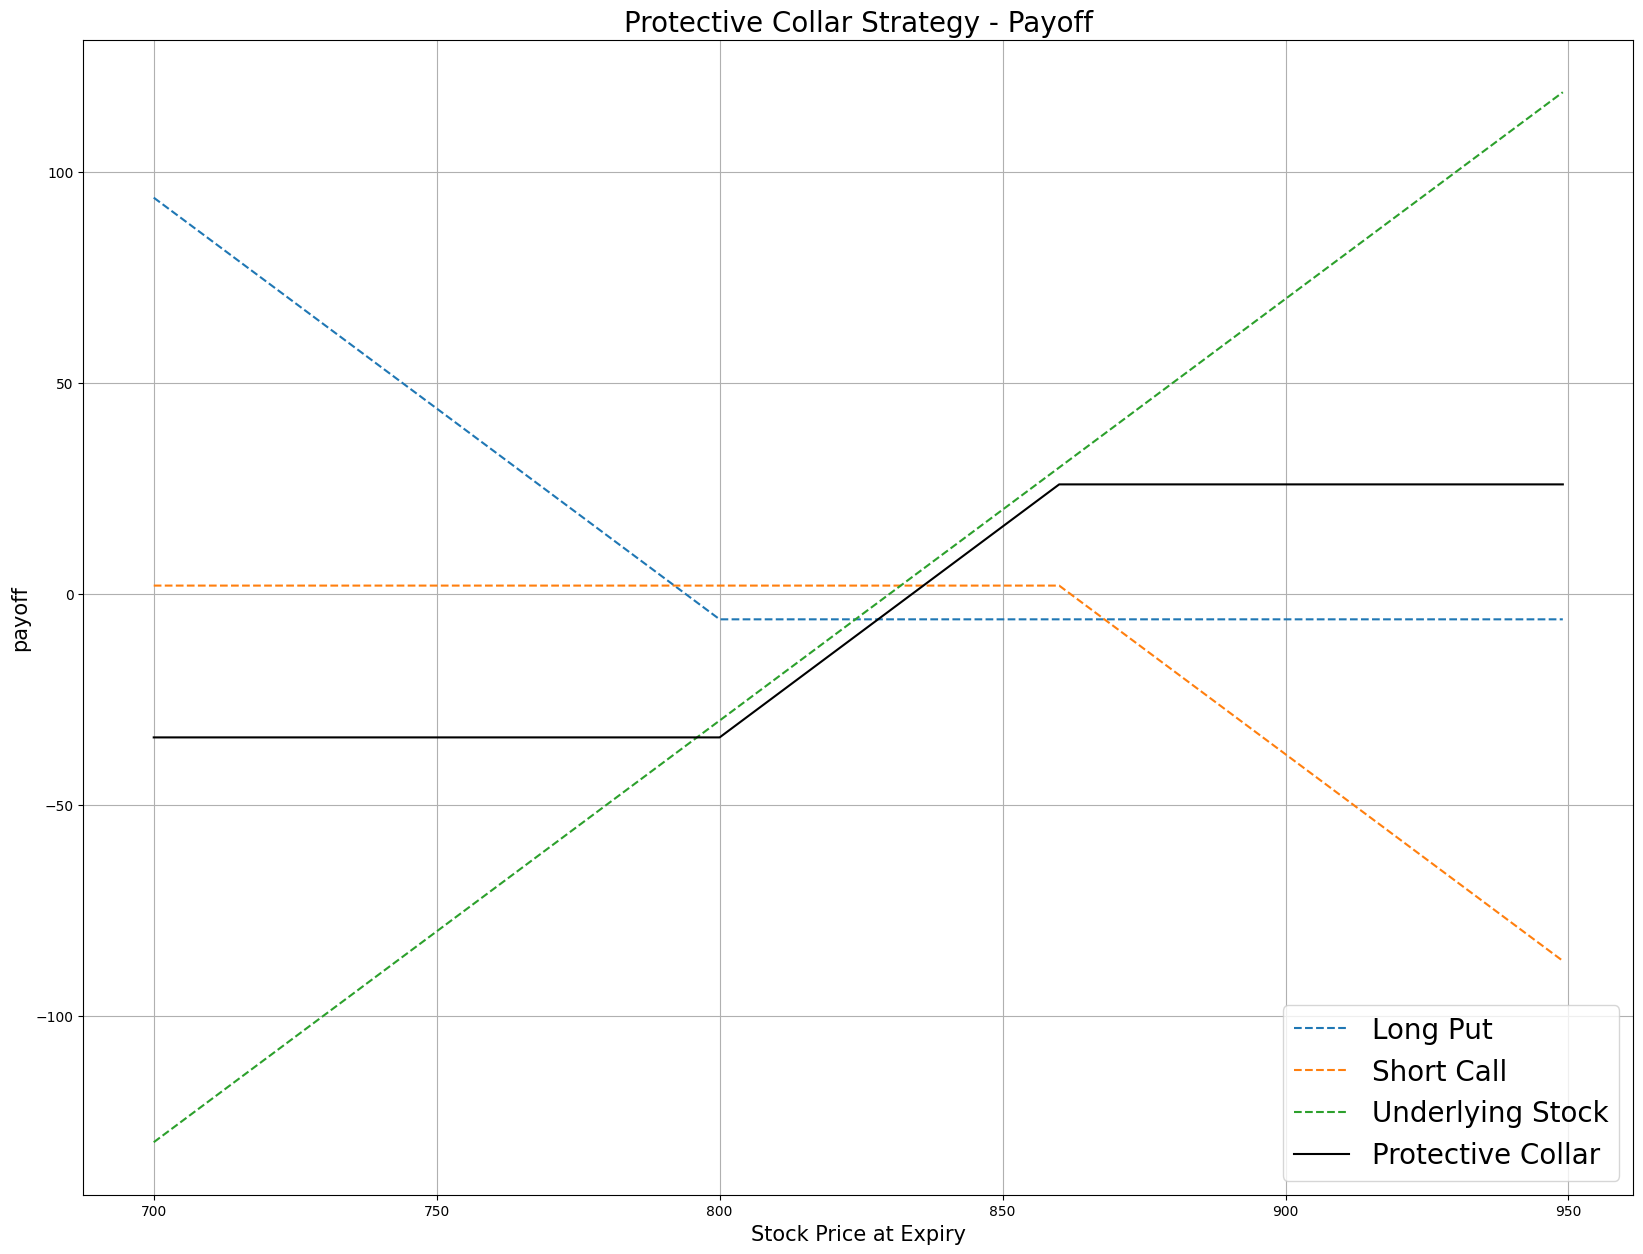

In [259]:
# https://www.quantconnect.com/learning/articles/applied-options/protective-collar
# Protective Collar
price = np.arange(700,950,1)
# assume at time 0, the price of the undelying stock is 830
k_otm_put = 800 # the strike price of OTM put
k_otm_call = 860 # the strike price of OTM call
premium_otm_put = 6 # the premium of OTM put
premium_otm_call = 2 # the premium of OTM call
# payoff for the long put position
payoff_long_put = [max(-premium_otm_put, k_otm_put-i-premium_otm_put) for i in price]
# payoff for the short call position
payoff_short_call = [min(premium_otm_call, -(i-k_otm_call-premium_otm_call)) for i in price]
# payoff for the underlying stock
payoff_stock = price - 830
# payoff for the Protective Collar Strategy
payoff = np.sum([payoff_long_put,payoff_short_call,payoff_stock], axis=0)
plt.figure(figsize=(20,15))
plt.plot(price, payoff_long_put, label = 'Long Put',linestyle='--')
plt.plot(price, payoff_short_call, label = 'Short Call',linestyle='--')
plt.plot(price, payoff_stock, label = 'Underlying Stock',linestyle='--')
plt.plot(price, payoff, label = 'Protective Collar',c='black')
plt.legend(fontsize = 20)
plt.xlabel('Stock Price at Expiry',fontsize = 15)
plt.ylabel('payoff',fontsize = 15)
plt.title('Protective Collar Strategy - Payoff',fontsize = 20)
plt.grid(True)

In [ ]:
Apple es 172.56

Compro un Put X 162 vale -2.17
Vender un Call X 180 vale +2.59

Ganando 42 centavos con las opciones


In [ ]:
Si el precio se va 185 
Gano 180 - 172.56 + 42 centavos 

In [ ]:
Si el precio se va a 150
Pierdo 172.56 - 162 + 42 centavos